**Exercise for k means**

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

**Importing IRIS Dataset**

In [2]:
from sklearn.datasets import load_iris
data = load_iris()

In [3]:
dir(data)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

**Creating our Dataframe**

In [4]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.drop(['sepal length (cm)', 'sepal width (cm)'], axis='columns', inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


**Elbow Plot**

In [6]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

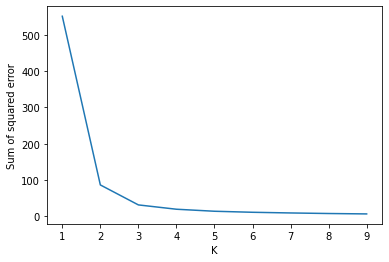

In [7]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

So we are going to have 3 numbers of clusters

**•	Pre-processing using min max scaler:**

In [8]:
scaler = MinMaxScaler()
df['petal length (cm)'] = scaler.fit_transform(df[['petal length (cm)']])
df['petal width (cm)'] = scaler.fit_transform(df[['petal width (cm)']])

**Clustering**

In [9]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(df)
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
df['cluster'] = yp
df.head(2)

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0


In [11]:
df.cluster.unique()

array([0, 1, 2])

In [12]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

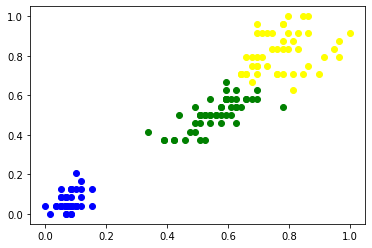

In [13]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')